<a href="https://colab.research.google.com/github/Roy025/ML-Lab/blob/main/LAB/pneumonia_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


**Set Up Paths**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Archive
! ls

[Errno 2] No such file or directory: 'drive/MyDrive/Archive'
/content/drive/MyDrive/Archive
__MACOSX  model.png  test  train  val


In [ ]:
train_dir = '/content/drive/MyDrive/Archive/train'
val_dir = '/content/drive/MyDrive/Archive/val'
test_dir = '/content/drive/MyDrive/Archive/test'

**Preprocess Data**

In [ ]:



train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(500,500),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    color_mode='grayscale')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                     target_size=(500,500),
                                                     batch_size=32,
                                                     class_mode='binary',
                                                     color_mode='grayscale')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                     target_size=(500,500),
                                                     batch_size=32,
                                                     class_mode='binary',
                                                     color_mode='grayscale')





print(f"Number of NORMAL images in training set: {len(os.listdir(os.path.join(train_dir+'/NORMAL')))}")
print(f"Number of PNEUMONIA images in training set: {len(os.listdir(os.path.join(train_dir+'/PNEUMONIA')))}")



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Number of NORMAL images in training set: 1341
Number of PNEUMONIA images in training set: 3875


**Image Visualization**

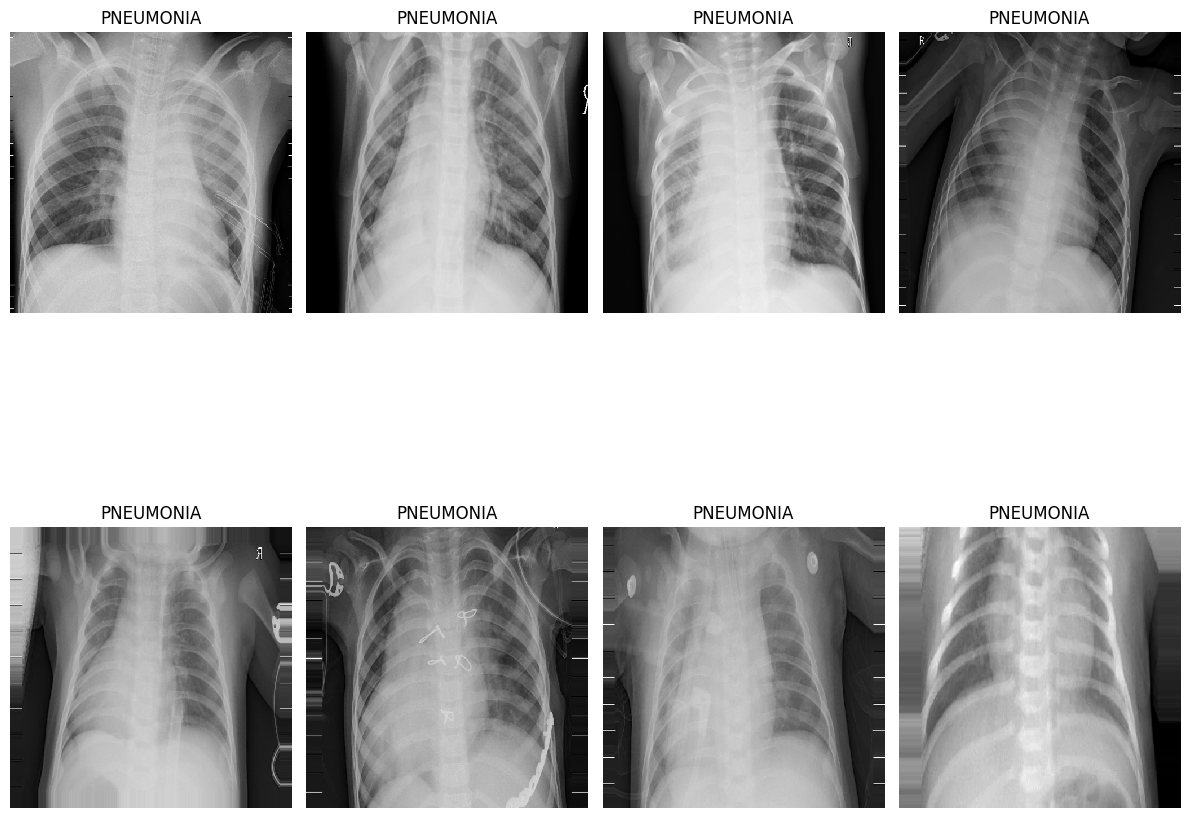

In [ ]:
def display_samples(generator, num_samples=8):
    plt.figure(figsize=(12, 12))
    classes = {0: 'NORMAL', 1: 'PNEUMONIA'}

    for i in range(num_samples):
        X_batch, Y_batch = next(generator)
        image = X_batch[0]

        plt.subplot(2, 4, i+1)
        plt.title(classes[int(Y_batch[0])])
        plt.axis('off')
        plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')

    plt.tight_layout()
    plt.show()

display_samples(train_generator)


**Build CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(activation = 'relu', units = 128))

model.add(Dense(activation = 'relu', units = 64))

model.add(Dense(activation = 'sigmoid', units = 1))

model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 249, 249, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 60, 60, 32)       

**Train Model**

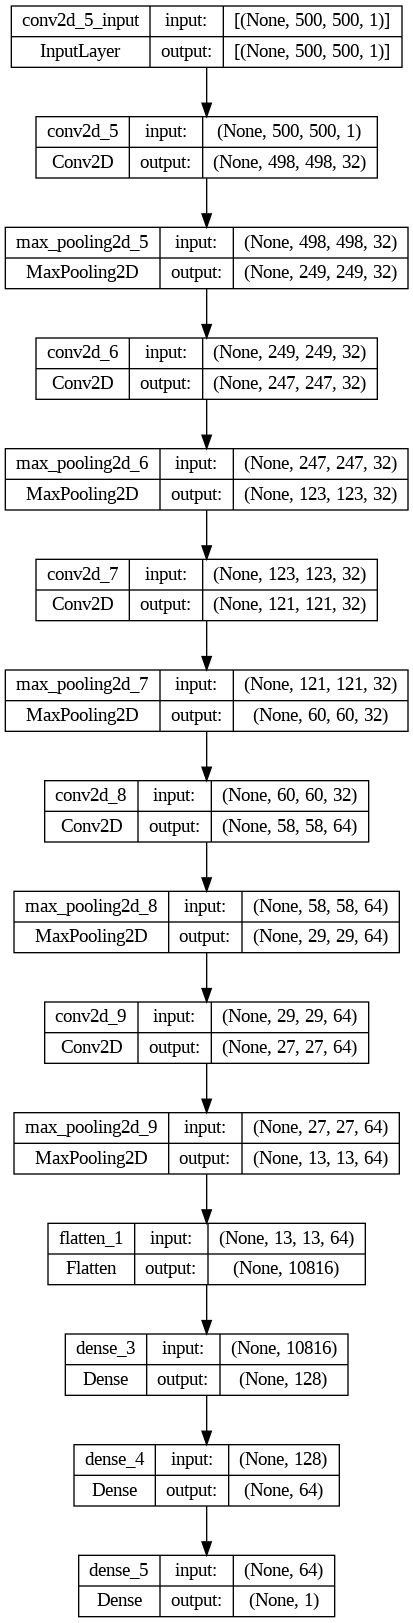

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
163/163 [==============================] - 165s 989ms/step - loss: 0.4004 - accuracy: 0.8252 - val_loss: 1.0358 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 162s 989ms/step - loss: 0.2271 - accuracy: 0.9105 - val_loss: 0.5189 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 158s 967ms/step - loss: 0.1814 - accuracy: 0.9317 - val_loss: 1.0075 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 160s 981ms/step - loss: 0.1879 - accuracy: 0.9270 - val_loss: 0.4876 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 159s 974ms/step - loss: 0.1459 - accuracy: 0.9446 - val_loss: 0.7926 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 161s 991ms/step - loss: 0.1480 - accuracy: 0.9431 - val_loss: 0.5176 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 158s 971ms/step - loss: 0.1418 - accuracy: 0.9461 - val_loss: 1.1676 -

**Evaluation**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


20/20 [==============================] - 7s 339ms/step - loss: 0.2430 - accuracy: 0.9087
Test Accuracy: 0.9086538553237915


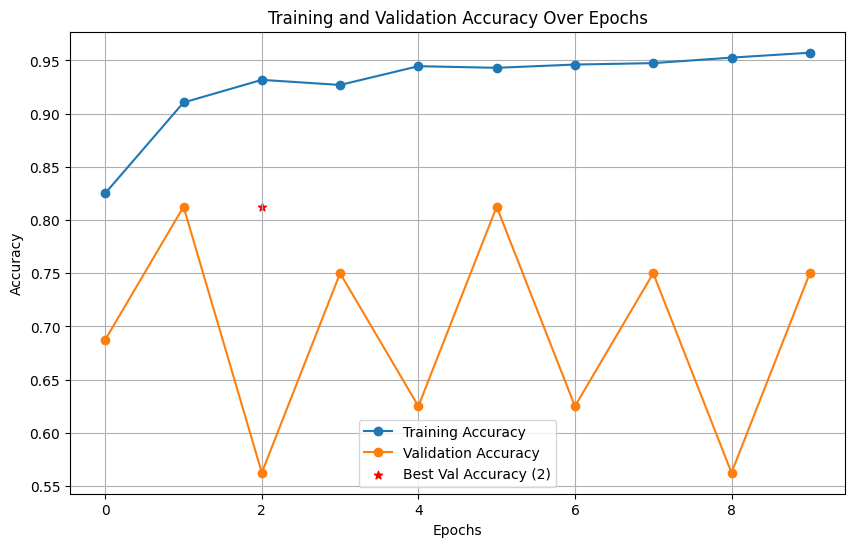

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

best_val_acc_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
plt.scatter(best_val_acc_epoch, max(history.history['val_accuracy']), color='red', marker='*', label=f'Best Val Accuracy ({best_val_acc_epoch})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
preds = model.predict(test_generator,verbose=1)

20/20 [==============================] - 6s 277ms/step


In [ ]:

predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1


**Confusion Matrix**

In [ ]:

cm = confusion_matrix(test_generator.classes, predictions)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 82 152]
 [129 261]]


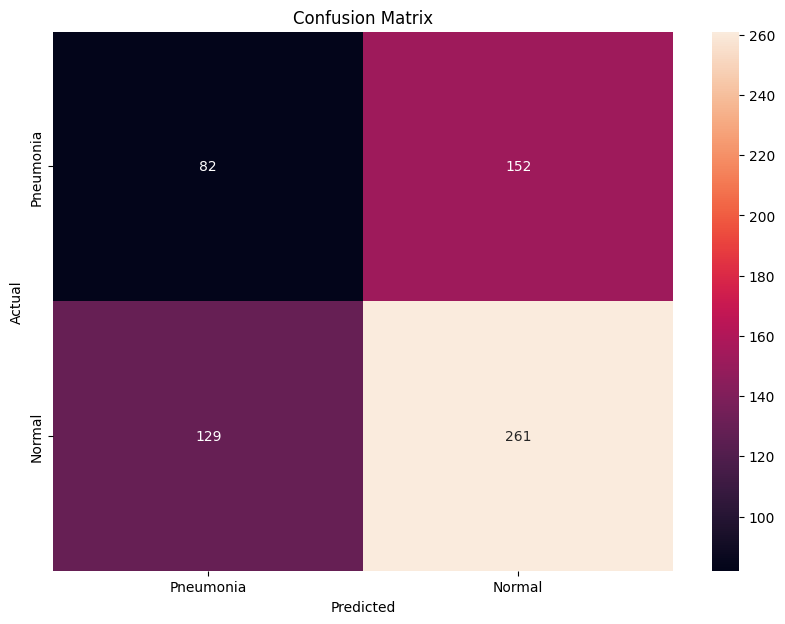

              precision    recall  f1-score   support

      Normal       0.39      0.35      0.37       234
   Pneumonia       0.63      0.67      0.65       390

    accuracy                           0.55       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.55      0.54       624



In [ ]:


plt.figure(figsize=(10, 7))
labels = ['Pneumonia', 'Normal']
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='g',  xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_true=test_generator.classes, y_pred=predictions, target_names=['Normal', 'Pneumonia']))

